In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
train, test = fashion_mnist.load_data()

In [3]:
X_train, y_train = train[0][:-5000]/255.0, train[1][:-5000]
X_valid, y_valid = train[0][-5000:]/255.0, train[1][-5000:]
X_test, y_test = test[0]/255.0, test[1]

In [4]:
# build model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.layers

In [7]:
model_weights = model.get_weights()
len(model_weights)

6

In [8]:
model_weights[0].shape, model_weights[1].shape # weights and biases of dense layer 1

((784, 300), (300,))

In [9]:
model_weights[2].shape, model_weights[3].shape

((300, 100), (100,))

In [10]:
model_weights[4].shape, model_weights[5].shape

((100, 10), (10,))

In [11]:
# compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [12]:
# train model, default batch_size = 32
history = model.fit(X_train, y_train, epochs=30, batch_size =1, validation_data=(X_valid, y_valid))

Epoch 1/30
55000/55000 [==============================] - 78s 1ms/step - loss: 0.5140 - accuracy: 0.8121 - val_loss: 0.4280 - val_accuracy: 0.8456
Epoch 2/30
55000/55000 [==============================] - 77s 1ms/step - loss: 0.3945 - accuracy: 0.8556 - val_loss: 0.3910 - val_accuracy: 0.8566
Epoch 3/30
55000/55000 [==============================] - 77s 1ms/step - loss: 0.3573 - accuracy: 0.8667 - val_loss: 0.3606 - val_accuracy: 0.8632
Epoch 4/30
55000/55000 [==============================] - 77s 1ms/step - loss: 0.3343 - accuracy: 0.8770 - val_loss: 0.3391 - val_accuracy: 0.8758
Epoch 5/30
55000/55000 [==============================] - 77s 1ms/step - loss: 0.3174 - accuracy: 0.8828 - val_loss: 0.3495 - val_accuracy: 0.8722
Epoch 6/30
55000/55000 [==============================] - 77s 1ms/step - loss: 0.3021 - accuracy: 0.8877 - val_loss: 0.3428 - val_accuracy: 0.8802
Epoch 7/30
55000/55000 [==============================] - 77s 1ms/step - loss: 0.2895 - accuracy: 0.8906 - val_loss: 0

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

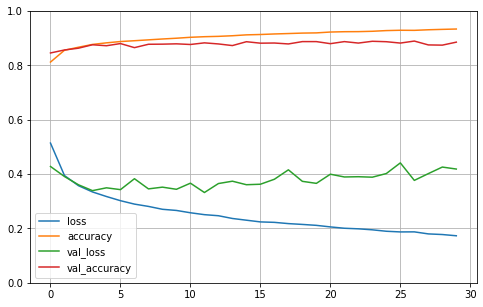

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
# model evaluation
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4270 - accuracy: 0.8832


[0.42699185013771057, 0.8831999897956848]

In [17]:
# model prediction
unknown = X_test[:3]
y_proba = model.predict(unknown)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
import numpy as np
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [19]:
unknown_labels = y_test[:3]
unknown_labels

array([9, 2, 1], dtype=uint8)

In [20]:
y_pred == unknown_labels

array([ True,  True,  True])

In [ ]:
a = [1,2,3,4,5,6,7,8,92]